###Data Description:
The data at hand contains medical costs of people
characterized by certain attributes.
Domain:
Healthcare
Context:
Leveraging customer information is paramount for most
businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to
have.
Attribute Information:
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body,
weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of
height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance /
Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast,
southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance.
Learning Outcomes:
####● Exploratory Data Analysis
####● Practicing statistics using Python
####● Hypothesis testing

###Objective:

We want to see if we can dive deep into this data to find some
valuable insights.
Steps and tasks:
####1. Import the necessary libraries
####2. Read the data as a data frame
####3. Perform basic EDA which should include the following and print out your insights at every step.
####a. Shape of the data
####b. Data type of each attribute
####c. Checking the presence of missing values
####d. 5 point summary of numerical attributes
####e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
####f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
####g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns
####h. Distribution of categorical columns (include children)
####i. Pair plot that includes all the columns of the data frame

4. Answer the following questions with statistical evidence
####a. Do charges of people who smoke differ significantly from the people who don't?
####b. Does bmi of males differ significantly from that of females?
####c. Is the proportion of smokers significantly different in different genders?
####d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


1. Import the necessary libraries

In [0]:
import warnings
warnings.simplefilter('ignore')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

2. Read the data as a data frame

In [60]:
ins_data = pd.read_csv("/content/drive/My Drive/Great_Lakes_Assignments/02_StatisticalLearning_Project2/insurance.csv")
print("File read successfully")

File read successfully


In [61]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Perform basic EDA which should include the following and print out your insights at every step.

In [62]:
# a. Checking the shape of data
ins_data.shape

(1338, 7)

In [63]:
#b. Data type of each attribute
ins_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [64]:
#c. Checking the presence of missing values

ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [65]:
# c. Checking null/nan values present in the data set

ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Answer- No nan/null values are present in the data set

In [66]:
# d. 5 point summary of numerical attributes
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


####Answer - In the above we can get all the required 5 point summary of the dataset
#####Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
#####1st Quartile: The 25th percentile.
#####3rd Quartile: The 75th percentile.
#####Minimum: The smallest observation in the sample.
#####Maximum: The largest observation in the sample.

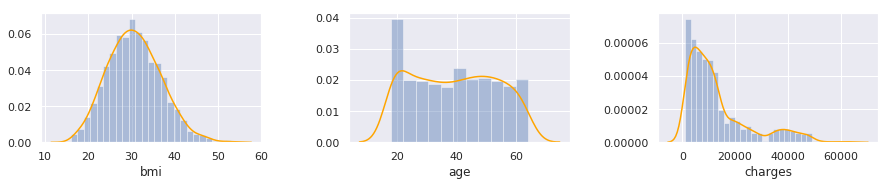

In [67]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

sns.set(rc={'figure.figsize':(15,10)})
plt.subplots_adjust(hspace=0.6, wspace=0.4)
sns.distplot(a=ins_data['bmi'], kde_kws={"color":'orange'}, axlabel='bmi', ax=plt.subplot(3,3,1))
sns.distplot(a=ins_data['age'], kde_kws={"color":'orange'}, axlabel='age', ax=plt.subplot(3,3,2))
sns.distplot(a=ins_data['charges'], kde_kws={"color":'orange'}, axlabel='charges', ax=plt.subplot(3,3,3));

#### bmi - normal distribution
#### age - distribution is uniform, except for ages below 25 where the histogram peaks.
#### charges - right skewed distribution.

In [68]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
ins_data_f = ins_data[['bmi','age','charges']]
ins_data_f.skew(axis = 0, skipna = True)

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

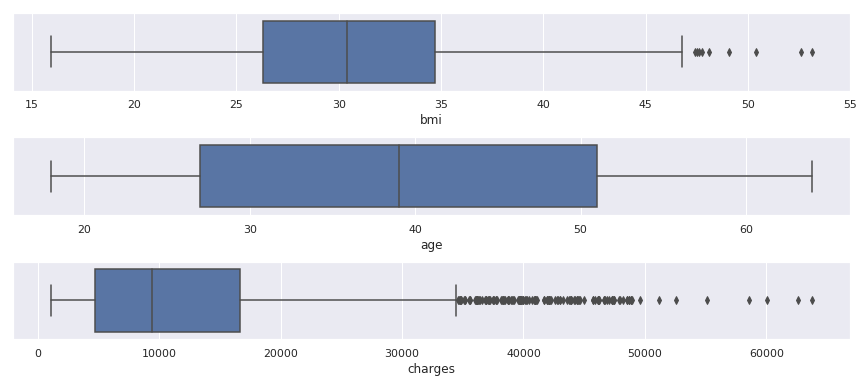

In [69]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
sns.set(rc={'figure.figsize':(15,6)})
plt.subplots_adjust(hspace=0.6, wspace=0.4)
sns.boxplot(ins_data['bmi'], ax=plt.subplot(3,1,1))
sns.boxplot(ins_data['age'], ax=plt.subplot(3,1,2))
sns.boxplot(ins_data['charges'], ax=plt.subplot(3,1,3));


### Answer (g) -  The above boxplot clearly show presence of outliers in BMI and Charges columns

In [70]:
# To do plotting with all the columns we will have to handle categorical columns by the following pocedure below

# 1.checking unique values of the categorical columns

print('Column Sex    = ', ins_data['sex'].unique())
print('Column Smoker = ', ins_data['smoker'].unique())
print('Column Region = ', ins_data['region'].unique())

Column Sex    =  ['female' 'male']
Column Smoker =  ['yes' 'no']
Column Region =  ['southwest' 'southeast' 'northwest' 'northeast']


In [71]:
# dealing with categorical data
from sklearn.preprocessing import LabelEncoder

#Creating a copy and not disturbing the original dataset
ins_data_pp = ins_data.copy()

# object creation of class LabelEncoder
label_encoder = LabelEncoder()

# Transforming the categorical data
label_encoder.fit(ins_data_pp['sex'])
ins_data_pp['sex'] = label_encoder.transform(ins_data_pp['sex'])

label_encoder.fit(ins_data_pp['smoker'])
ins_data_pp['smoker'] = label_encoder.transform(ins_data_pp['smoker'])

label_encoder.fit(ins_data_pp['region'])
ins_data_pp['region'] = label_encoder.transform(ins_data_pp['region'])

# Check
ins_data_pp.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [72]:
#h. Distribution of categorical columns (include children)
ins_data_dc = ins_data_pp[['sex','smoker','region','children']]
ins_data_dc.sample(5)


,sex,smoker,region,children
388,0,0,1,0
258,1,0,1,4
559,1,0,1,0
33,1,0,1,0
1060,1,0,2,0


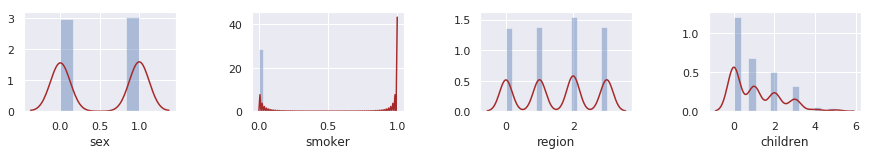

In [73]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.distplot(a=ins_data_dc['sex'], kde_kws={"color":'brown'}, axlabel='sex', ax=plt.subplot(4,4,1))
sns.distplot(a=ins_data_dc['smoker'], kde_kws={"color":'brown'}, axlabel='smoker', ax=plt.subplot(4,4,2))
sns.distplot(a=ins_data_dc['region'], kde_kws={"color":'brown'}, axlabel='region', ax=plt.subplot(4,4,3));
sns.distplot(a=ins_data_dc['children'], kde_kws={"color":'brown'}, axlabel='children', ax=plt.subplot(4,4,4));


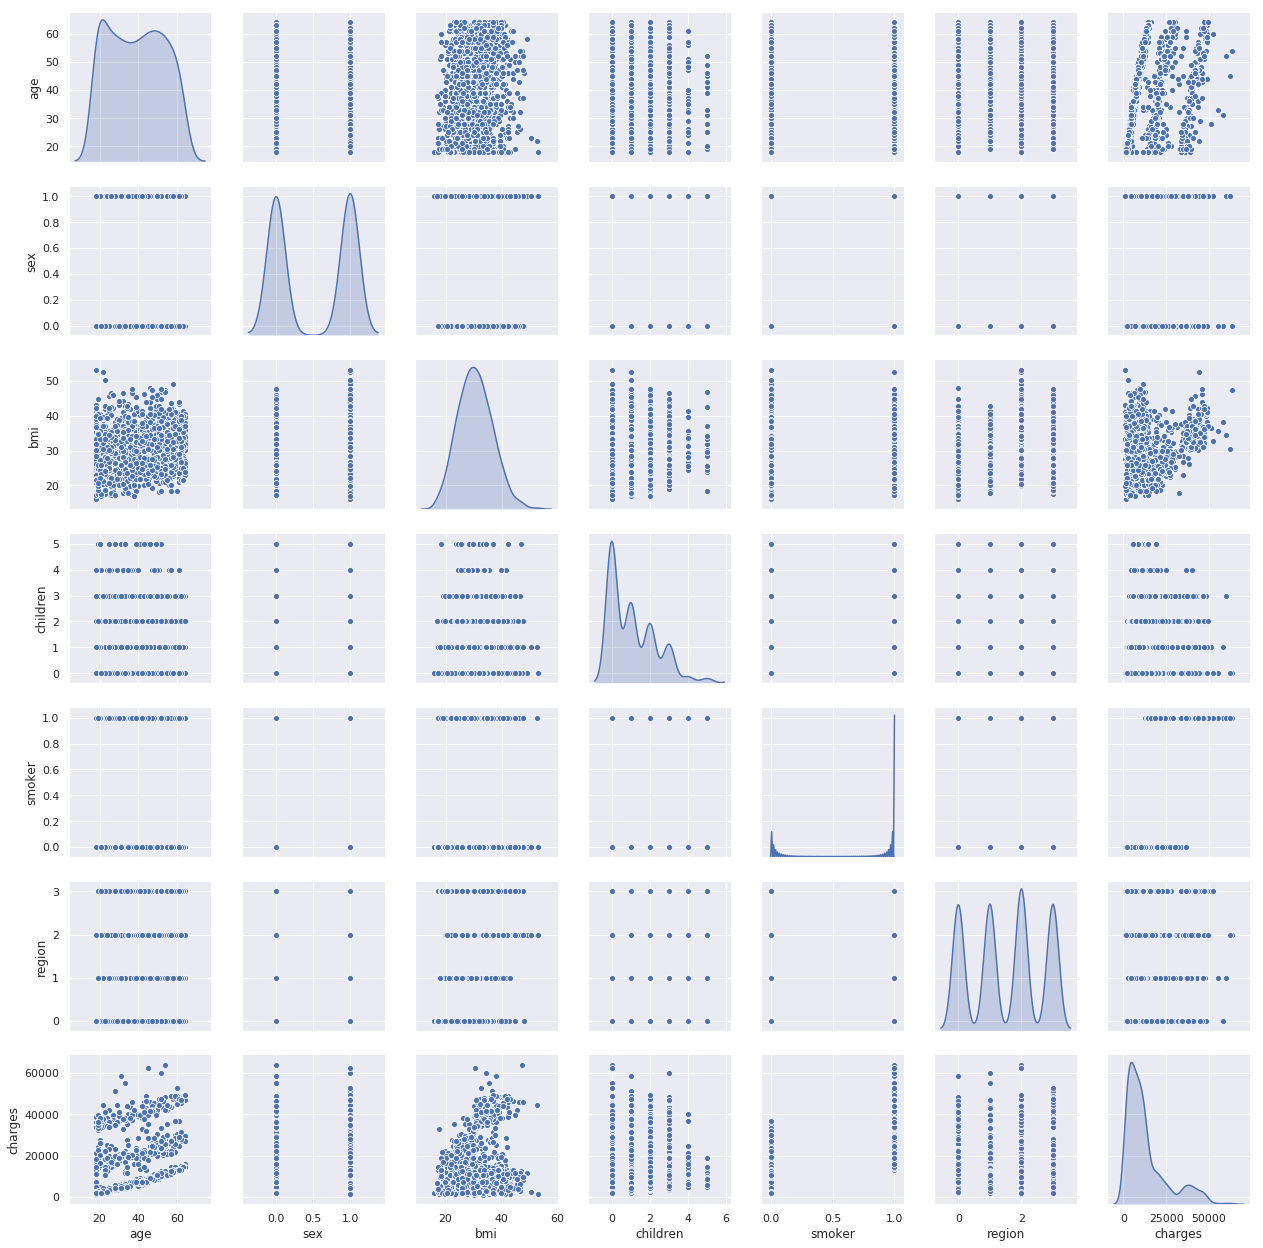

In [74]:
#i. Pair plot that includes all the columns of the data frame

sns.pairplot(data=ins_data_pp, diag_kind='kde');

#4. Answer the following questions with statistical evidence


####4a. Do charges of people who smoke differ significantly from the people who don't?


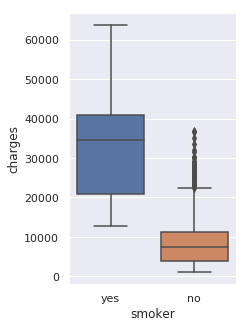

In [80]:
sns.set(rc={'figure.figsize':(3,5)})
sns.boxplot(data=ins_data, y='charges', x='smoker');

In [106]:
#4a - Statistical evidence
#hypothesis test
# Null hypothesis - Mu=0  charges do not differ significantly, Pvalue > 5%
# Alternative hypothesis - Mu > 0 charges differ significantly, Pvalue < 5%

# ANOVA Test

tstatistic, pval =stats.f_oneway(ins_data[ins_data['smoker']=='yes']['charges'], ins_data[ins_data['smoker']=='no']['charges'])

print("P-value = ", (str(pval*100) +'%'))


P-value =  8.271435842182967e-281%


####Answer (a) - Yes as we can see as the Pvalue is less the 5%, As per the ANOVA Test, Null hypothesis is rejected i.e. charges of people who smoke differ significantly from the people who don't. Same can be seen in the boxplot also.

####4b. Does bmi of males differ significantly from that of females?


In [105]:
#4b - Statistical evidence
#hypothesis test
# Null hypothesis - Mu=0  bmi of males do not differ significantly from that of females.  Pvalue > 5%
# Alternative hypothesis - Mu > 0 bmi of males differ significantly from that of females.  Pvalue < 5%

# ANOVA Test

tstatistic, pval =stats.f_oneway(ins_data[ins_data['sex']=='female']['bmi'], ins_data[ins_data['sex']=='male']['bmi'])

print("P-value = ", (str(pval*100) +'%'))

P-value =  8.997637178992054%


In [93]:
# two sample test 
tstatistic, pval =stats.ttest_ind(ins_data_pp[ins_data_pp['sex']==0]['bmi'], ins_data_pp[ins_data_pp['sex']==1]['bmi'])

print("P-value = ", (str(pval*100) +'%'))



P-value =  8.997637178984933%


####Answer (b) - In both one & 2 sample test we can see that the Pvalue is greater than 5% so we Failed to reject Null Hypothesis i.e. bmi of males do not differ significantly from that of females


####4c. Is the proportion of smokers significantly different in different genders?


In [98]:
#4c - Statistical evidence
#hypothesis test
# Null hypothesis - Mu=0  proportion of smokers do not differ significantly based on gender. Pvalue > 5%
# Alternative hypothesis - Mu=!0(not equal to zero) proportion of smokers differ significantly based on gender.  Pvalue < 5%

# Two sample test

tstatistic, pval =stats.ttest_ind(ins_data_pp[ins_data_pp['sex']==0]['smoker'], ins_data_pp[ins_data_pp['sex']==1]['smoker'])

print("P-value = ", (str(pval*100) +'%'))

P-value =  0.5300369127374036%


###Answer (c) - Pvalue is less than 5% - Null hypothesis is rejected i.e. proportion of smokers significantly different in different genders

####d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [103]:
# Null hypothesis - distribution of bmi across women with no children, one child and two children is same, Pvalue > 5%
# Alternate hypothesis - distribution of bmi across women with no children, one child and two children is not same, Pvalue < 5%

# bmi of women - 0 children
bmi_women_zero_child = ins_data[(ins_data['sex']=='female')&(ins_data['children'] == 0)]['bmi']

# bmi of women - 1 children
bmi_women_one_child = ins_data[(ins_data['sex']=='female')&(ins_data['children'] == 1)]['bmi']

# bmi of women - 2 children
bmi_women_two_child = ins_data[(ins_data['sex']=='female')&(ins_data['children'] == 2)]['bmi']

# ANOVA with 3 samples
tstatistic, pval =stats.f_oneway(bmi_women_zero_child, bmi_women_one_child, bmi_women_two_child)
print("P-value = ", (str(pval*100) +'%'))



P-value =  71.58579926754841%


####Answer (d) - As per the ANOVA test PValue is greater than 5%, Failed to reject Null Hypothesis i.e. distribution of bmi across women with no children, one child and two children is same.
